In [1]:
# %load ../init_setup/setup
# ==- INITIAL SETUP -===============================================================================
import math
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
from ipywidgets import interact

np.set_printoptions(formatter={'float': '{: 0.5f}'.format}, suppress = True)
matplotlib.rcParams.update({'font.size': 18})
plt.style.use('seaborn-whitegrid')

# ==- PLOT PARAMETERS -=============================================================================
loglogalpha = 0.70
baralpha    = 0.85

plot_size = (14,8)
subplot_size = (7,4)

# ==- COLOR PALETTE -===============================================================================
c_red = "#e6194b" # red
c_gre = "#3cb44b" # green
c_yel = "#ffe119" # yellow
c_blu = "#4363d8" # blue
c_ora = "#f58231" # orange
c_pur = "#911eb4" # purple
c_cya = "#42d4f4" # cyan
c_mag = "#f032e6" # magenta
c_lim = "#bfef45" # lime
c_pin = "#fabebe" # pink
c_tea = "#469990" # teal
c_lav = "#e6beff" # lavender
c_bro = "#9A6324" # brown
c_bei = "#fffac8" # beige
c_mar = "#800000" # maroon
c_min = "#aaffc3" # mint
c_oli = "#808000" # olive
c_apr = "#ffd8b1" # apricot
c_nav = "#000075" # navy
c_gra = "#a9a9a9" # gray
c_whi = "#ffffff" # white
c_bla = "#000000" # black

accessibility_95    = [c_red, c_gre, c_blu, c_yel, c_ora, c_pur, c_cya,
                       c_mag, c_lim, c_pin, c_tea, c_lav, c_bro, c_bei,
                       c_mar, c_min, c_oli, c_apr, c_nav, c_gra, c_bla]
accessibility_99    = [c_red, c_gre, c_blu, c_yel, c_ora, c_cya, c_mag,
                       c_pin, c_tea, c_lav, c_bro, c_bei, c_mar, c_min,
                       c_nav, c_gra, c_bla]
accessibility_99_99 = [c_blu, c_yel, c_ora, c_pin, c_lav, c_mar, c_nav,
                       c_gra, c_bla]
accessibility_100   = [c_blu, c_yel, c_gra, c_bla]


In [2]:
# %load ../init_setup/setup2
matplotlib.rcParams.update({'font.size': 16})


In [3]:
def filter_spaces(word):
    if (word == ''):
        return False
    else:
        return True

# Read a file containing an array of arbitrary size
def file_to_nDarrs(filename):
    arr = []
    f = open(filename, 'r')
    
    for line in f:
        orig_arr  = line.replace("\n", "").split(" ")
        filt_arr  = list(filter(filter_spaces, orig_arr))
        float_arr = []
        for x in filt_arr:
            float_arr.append(float(x))
        if len(float_arr) == 1:
            arr.append(float_arr[0])
        else:
            arr.append(np.array(float_arr))
    f.close()
    return np.array(arr)

In [4]:
MDIR = "../data/KF_tests/"
SVECSDIR    = "init_statevecs/"
CHI2ERRORDIR = "chi2error/"
EVENTFILENAMES = ["e005", "e006", "e012", "e017", "e025", "e030",
                  "e035", "e036", "e038", "e040", "e048", "e052",
                  "e055", "e057", "e059", "e060", "e063", "e067",
                  "e069", "e071", "e080", "e082", "e083", "e088",
                  "e089", "e092", "e095", "e103", "e113", "e119",
                  "e123", "e124", "e130", "e134", "e138", "e139"]
notable_events = ["e005", "e067", "e103"]

sv_distance = file_to_nDarrs(MDIR + SVECSDIR + "sv_distance").transpose()

chi2arr = []
for event in notable_events:
    chi2arr.append(file_to_nDarrs(MDIR + CHI2ERRORDIR + event))

chi2arr_t = []
for i in range(len(chi2arr)):
    chi2arr_t.append(chi2arr[i].transpose())

# Chi^2 Convergence

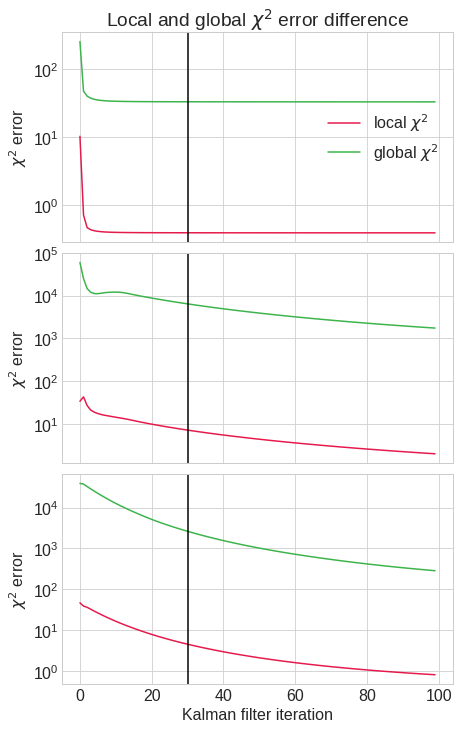

In [5]:
clen = len(chi2arr_t)

index = []
for arr in chi2arr_t:
    index.append(np.arange(len(arr[0])))
    
f, axes = plt.subplots(nrows=3, ncols=1, sharex="col", sharey="row")
f.set_size_inches((7,int(4*clen)))

acc95=accessibility_95
for i in range(0, clen):
    axes[i].plot(index[i],   chi2arr_t[i][0],   color=c_red, label="local $\chi^2$")
    axes[i].plot(index[i],   chi2arr_t[i][1],   color=c_gre, label="global $\chi^2$")

for i in range(len(axes)):
    axes[i].axvline(x=30, color=c_bla)
    axes[i].set_yscale("log")
    axes[i].set_ylabel("$\chi^2$ error")

axes[0].legend()
axes[0].set_title("Local and global $\chi^2$ error difference")
axes[2].set_xlabel("KF iteration")
axes[2].set_xlabel("Kalman filter iteration")

f.subplots_adjust(hspace=0.05, wspace=0)
# plt.tight_layout()
plt.show()

### Initial SV distances

In [7]:
def remove_outliers(x, outlier_constant):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlier_constant
    quartile_set = (lower_quartile - IQR, upper_quartile + IQR)
    result_list = []
    for y in a.tolist():
        if y >= quartile_set[0] and y <= quartile_set[1]:
            result_list.append(y)
    return result_list

def hist_subplots(arrs, labels, n_bins):
    f, axes = plt.subplots(nrows=3, ncols=2)
    f.set_size_inches((14,12))

    distance = [0, 2.8834417548914426, 9.964671657013731, 0.13216418899807877, 0.09719848580840222, 0.3185387710734157]
    
    for i in range(0, 6, 2):
        axes[int(i/2),0].axvline(x=-distance[i], color=c_bla)
        axes[int(i/2),0].axvline(x=distance[i], color=c_bla)
        axes[int(i/2),0].hist(arrs[i], bins=n_bins, color=c_red)
        axes[int(i/2),0].set_title(labels[i])
        
        axes[int(i/2),1].axvline(x=-distance[i+1], color=c_bla)
        axes[int(i/2),1].axvline(x=distance[i+1], color=c_bla)
        axes[int(i/2),1].hist(arrs[i+1], bins=n_bins, color=c_red)
        axes[int(i/2),1].set_title(labels[i+1])

    axes[0,0].axvline(x=-2.8834417548914426, color=c_bla)
    plt.suptitle("Distance between last and first initial vectors")
    plt.tight_layout()

    plt.show()
    return

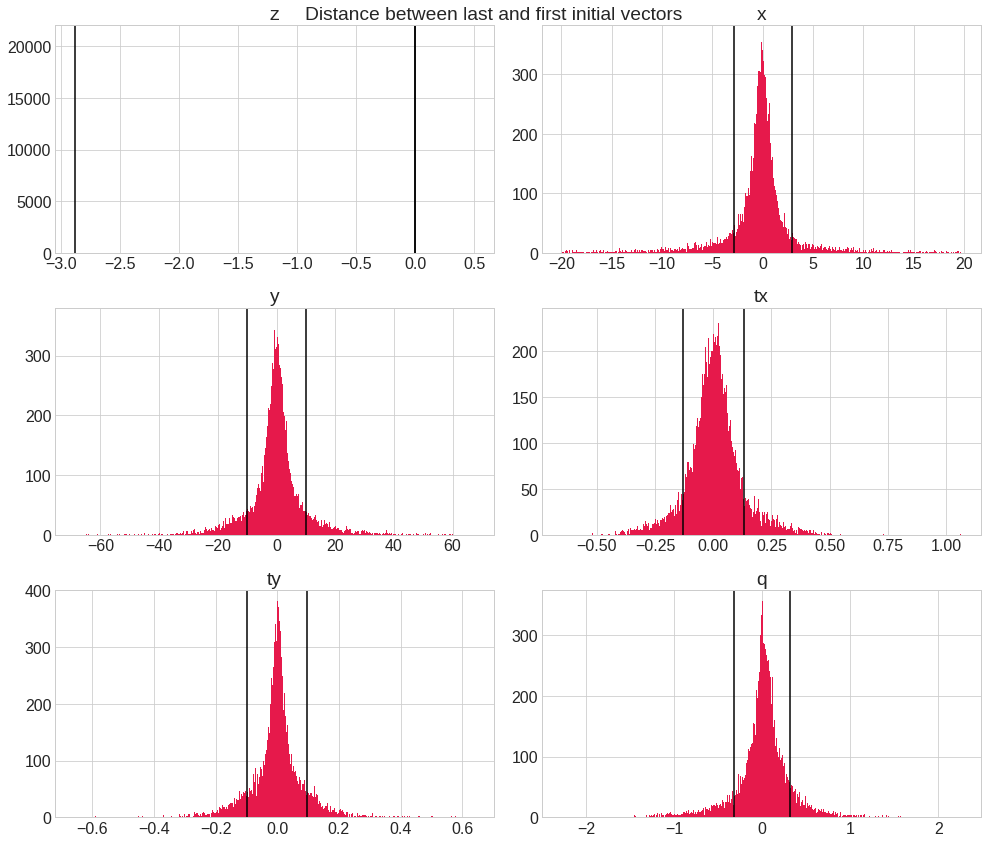

In [8]:
clean_sv_distance = []
for arr in sv_distance:
    clean_sv_distance.append(remove_outliers(arr, 10))
clean_sv_distance = np.array(clean_sv_distance)

init_statevecs = []
for e_filename in EVENTFILENAMES:
    init_statevecs.append(file_to_nDarrs(MDIR + SVECSDIR + e_filename))

n_bins = 1000
labels = ["z", "x", "y", "tx", "ty", "q", "B", 
          "covmat[0][0]", "covmat[1][1]", "covmat[2][2]", "covmat[3][3]", "covmat[4][4]",  "chi2"]

notable_events = [0, 5, 12, 17, 27, 22]
notable_statevecs = []

for i in notable_events:
    notable_statevecs.append(init_statevecs[i])

hist_subplots(clean_sv_distance[0:6], labels, n_bins)

### chi^2 error convergence

In [15]:
def scatter_plot(arrs, names, title, yscale):
    f, axes = plt.subplots(nrows=3, ncols=1, sharex="col", sharey="row")
    f.set_size_inches((7,12))
    
    index = np.arange(len(arrs[0][0]))

    for i in range(len(arrs)):
        for j in range(len(arrs[i])):
            axes[i].scatter(index, arrs[i][j], c=accessibility_99[j], label=names[j])
            axes[i].plot(   index, arrs[i][j], c=accessibility_99[j], alpha=baralpha)
        axes[i].set_yscale(yscale)
        axes[i].set_ylabel("$\chi^2$ error")

    axes[0].set_title("Local $\chi^2$ error for 6 random state vectors")
    axes[0].legend()
    axes[2].set_xlabel("KF iteration")

    f.subplots_adjust(hspace=0.05, wspace=0)
#     plt.tight_layout()
    plt.show()
    return

In [24]:
RANDOMSVSDIR = "mkf_proof_of_concept/"
EVENTS       = ["e005", "e030", "e055", "e067", "e083", "e103"]
TESTS        = ["orig", "test1", "test2", "test3", "test4", "test5", "test6"]
random_statevecs = []
for event in EVENTS:
    random_statevecs.append([])
    for test in TESTS:
        event += '/'
        random_statevecs[-1].append(file_to_nDarrs(MDIR + RANDOMSVSDIR + event + test))

chi2_arr = []
for i in range(len(random_statevecs)):
    chi2_arr.append([])
    for j in range(len(random_statevecs[i])):
        chi2_arr[i].append([])
        for k in range(len(random_statevecs[i][j])):
            chi2_arr[i][j].append(random_statevecs[i][j][k][6])

notable_events = [chi2_arr[0], chi2_arr[3], chi2_arr[5]]
events = ["event #5", "event #67", "event #103"]
names  = ["original sv", "random sv 1", "random sv 2", "random sv 3", "random sv 4", "random sv 5", "random sv 6"]


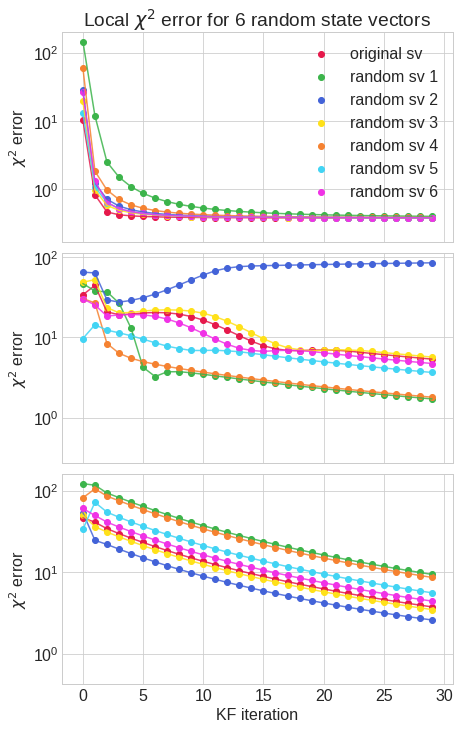

In [25]:
scatter_plot(notable_events, names, events, "log")